In [95]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '72b377f9-0a11-4d0c-89de-aa973a489420',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-10T14:19:36.503Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 10836}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11929, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [97]:
type(data)

dict

In [99]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [101]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11929,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19822325.00000,19822325.00000,False,NaN,1,NaN,NaN,None,2025-02-10T14:18:00.000Z,97737.82719,38616193146.43586,69.58500,0.10319,1.60566,3.20938,3.65534,-3.33163,13.73538,1937390975302.32935,60.63030,2052494370935.23999,None,2025-02-10T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:19:43.427610
1,1027,Ethereum,ETH,ethereum,9921,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120538206.57948,120538206.57948,True,NaN,2,NaN,NaN,None,2025-02-10T14:18:00.000Z,2663.03457,20732024269.92518,48.36280,0.44197,1.18954,3.93869,-18.31814,-32.53243,-18.13474,320997411231.12494,10.04560,320997411231.12000,None,2025-02-10T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:19:43.427610
2,825,Tether USDt,USDT,tether,116025,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141618460040.08759,143570568865.71902,True,NaN,3,NaN,NaN,None,2025-02-10T14:18:00.000Z,1.00005,83318429482.64764,37.69780,-0.02419,-0.01887,-0.04726,0.02915,-0.01993,-0.03508,141626133141.83182,4.42990,143578347735.66000,None,2025-02-10T14:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-10 21:19:43.427610
3,52,XRP,XRP,xrp,1526,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,None,2025-02-10T14:18:00.000Z,2.43916,5497060406.94073,37.63050,0.67462,1.13156,7.89768,2.31671,1.15702,279.64001,140892044659.90308,4.40420,243915920009.01999,None,2025-02-10T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:19:43.427610
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487917145.93979,593798148.24889,True,NaN,5,NaN,NaN,None,2025-02-10T14:18:00.000Z,206.80152,4116046646.92665,38.46400,1.49396,4.38507,7.68575,11.18706,-10.91757,-0.85543,100902008411.24483,3.15850,122798360844.21001,None,2025-02-10T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:19:43.427610
5,1839,BNB,BNB,bnb,2353,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142479627.48000,142479627.48000,False,NaN,6,NaN,NaN,None,2025-02-10T14:19:00.000Z,605.17913,1946359572.39531,-34.83180,0.00797,-3.41306,6.99970,-12.90695,-15.39782,-2.62433,86225696611.57060,2.69750,86225696611.57001,None,2025-02-10T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:19:43.427610
6,3408,USDC,USDC,usd-coin,25589,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56371901217.63390,56371901217.63390,False,NaN,7,NaN,NaN,None,2025-02-10T14:18:00.000Z,0.99989,7407367173.91888,53.53510,-0.02787,-0.02326,-0.00513,0.01148,-0.01190,0.01110,56365778411.05535,1.76440,56365778411.06000,None,2025-02-10T14:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-10 21:19:43.427610
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147988296383.70523,147988296383.70523,True,NaN,8,NaN,NaN,None,2025-02-10T14:18:00.000Z,0.25231,1470531118.46937,43.68120,0.56852,0.51453,2.93625,-24.60462,-38.99263,-29.39941,37338769090.19439,1.16790,37338769090.19000,None,2025-02-10T14:18:00.000Z,

In [103]:
df = pd.DataFrame()

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '72b377f9-0a11-4d0c-89de-aa973a489420',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print("Data terbaru berhasil diambil.")

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error saat mengambil data: {e}")
        return  # Keluar dari fungsi jika ada error

    # Konversi data ke DataFrame
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')  # ✅ Perbaikan kesalahan penulisan

    # Gabungkan dengan DataFrame utama
    df

    if not os.path.isfile(r'C:\Users\HP\Documents\Analisis Data\Python\API.csv'):
        df.to_csv(r'C:\Users\HP\Documents\Analisis Data\Python\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\HP\Documents\Analisis Data\Python\API.csv', mode = 'a', header = False)

In [105]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print(f"Iteration {i+1}/333 - API Runner completed")
    sleep(60)  # ✅ Pastikan menggunakan sleep() yang benar
exit()

Data terbaru berhasil diambil.
Iteration 1/333 - API Runner completed
Data terbaru berhasil diambil.
Iteration 2/333 - API Runner completed
Data terbaru berhasil diambil.
Iteration 3/333 - API Runner completed


KeyboardInterrupt: 

In [109]:
df70 = pd.read_csv(r"C:\Users\HP\Documents\Analisis Data\Python\API.csv")
df70

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11929,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19822325.00000,19822325.00000,False,NaN,1,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,97817.63416,38357985821.29745,66.79410,0.36475,1.84671,3.43393,3.69273,-3.24433,13.59301,1938972935112.49951,60.44670,2054170317425.55005,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
1,1,1027,Ethereum,ETH,ethereum,9921,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120538206.57948,120538206.57948,True,NaN,2,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2662.74136,20440628164.42952,43.85080,0.60789,1.32101,4.22420,-18.41165,-32.60559,-18.19815,320962068357.09961,10.00590,320962068357.09998,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
2,2,825,Tether USDt,USDT,tether,116022,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141618460040.08759,143570568865.71902,True,NaN,3,NaN,NaN,NaN,2025-02-10T14:10:00.000Z,1.00021,83168806228.42476,36.86860,0.00031,0.00266,-0.02882,0.03148,0.01074,-0.01630,141647648140.06940,4.42350,143600159302.70999,NaN,2025-02-10T14:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-10 21:11:44.225723
3,3,52,XRP,XRP,xrp,1526,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2.44428,5494067860.60400,37.92460,1.09791,1.62455,8.52533,2.14969,1.45403,278.88882,141187915520.16449,4.40430,244428139228.06000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,487917145.93979,593798148.24889,True,NaN,5,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,207.51558,4106249712.11266,38.63340,2.11905,5.00114,8.40938,11.31871,-10.15457,-1.19058,101250410376.74124,3.15850,123222368165.28999,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
5,5,1839,BNB,BNB,bnb,2353,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142479627.48000,142479627.48000,False,NaN,6,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,605.81566,1953419898.11370,-35.13440,0.14592,-3.20392,7.44974,-12.91685,-15.18097,-2.76249,86316389040.39436,2.69050,86316389040.39000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
6,6,3408,USDC,USDC,usd-coin,25588,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56371901217.63390,56371901217.63390,False,NaN,7,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.99998,7138686614.08752,43.92180,0.00558,-0.01339,0.01564,-0.01315,0.02193,0.02603,56370798255.84194,1.75850,56370798255.84000,NaN,2025-02-10T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-10 21:11:44.225723
7,7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147988296383.70523,147988296383.70523,True,NaN,8,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.25294,1468463803.15343,43.53450,1.16627,1.00038,3.63232,-24.63316,-38.55581,-30.38252,37432629770.15999,1.16900,37432629770.16000,NaN,2025-02-10T14:11:00

In [111]:
df70

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11929,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19822325.00000,19822325.00000,False,NaN,1,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,97817.63416,38357985821.29745,66.79410,0.36475,1.84671,3.43393,3.69273,-3.24433,13.59301,1938972935112.49951,60.44670,2054170317425.55005,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
1,1,1027,Ethereum,ETH,ethereum,9921,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120538206.57948,120538206.57948,True,NaN,2,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2662.74136,20440628164.42952,43.85080,0.60789,1.32101,4.22420,-18.41165,-32.60559,-18.19815,320962068357.09961,10.00590,320962068357.09998,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
2,2,825,Tether USDt,USDT,tether,116022,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141618460040.08759,143570568865.71902,True,NaN,3,NaN,NaN,NaN,2025-02-10T14:10:00.000Z,1.00021,83168806228.42476,36.86860,0.00031,0.00266,-0.02882,0.03148,0.01074,-0.01630,141647648140.06940,4.42350,143600159302.70999,NaN,2025-02-10T14:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-10 21:11:44.225723
3,3,52,XRP,XRP,xrp,1526,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2.44428,5494067860.60400,37.92460,1.09791,1.62455,8.52533,2.14969,1.45403,278.88882,141187915520.16449,4.40430,244428139228.06000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,487917145.93979,593798148.24889,True,NaN,5,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,207.51558,4106249712.11266,38.63340,2.11905,5.00114,8.40938,11.31871,-10.15457,-1.19058,101250410376.74124,3.15850,123222368165.28999,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
5,5,1839,BNB,BNB,bnb,2353,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142479627.48000,142479627.48000,False,NaN,6,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,605.81566,1953419898.11370,-35.13440,0.14592,-3.20392,7.44974,-12.91685,-15.18097,-2.76249,86316389040.39436,2.69050,86316389040.39000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
6,6,3408,USDC,USDC,usd-coin,25588,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56371901217.63390,56371901217.63390,False,NaN,7,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.99998,7138686614.08752,43.92180,0.00558,-0.01339,0.01564,-0.01315,0.02193,0.02603,56370798255.84194,1.75850,56370798255.84000,NaN,2025-02-10T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-10 21:11:44.225723
7,7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147988296383.70523,147988296383.70523,True,NaN,8,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.25294,1468463803.15343,43.53450,1.16627,1.00038,3.63232,-24.63316,-38.55581,-30.38252,37432629770.15999,1.16900,37432629770.16000,NaN,2025-02-10T14:11:00

In [117]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [113]:
df = df70

In [119]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11929,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19822325.00000,19822325.00000,False,NaN,1,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,97817.63416,38357985821.29745,66.79410,0.36475,1.84671,3.43393,3.69273,-3.24433,13.59301,1938972935112.49951,60.44670,2054170317425.55005,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
1,1,1027,Ethereum,ETH,ethereum,9921,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120538206.57948,120538206.57948,True,NaN,2,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2662.74136,20440628164.42952,43.85080,0.60789,1.32101,4.22420,-18.41165,-32.60559,-18.19815,320962068357.09961,10.00590,320962068357.09998,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
2,2,825,Tether USDt,USDT,tether,116022,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141618460040.08759,143570568865.71902,True,NaN,3,NaN,NaN,NaN,2025-02-10T14:10:00.000Z,1.00021,83168806228.42476,36.86860,0.00031,0.00266,-0.02882,0.03148,0.01074,-0.01630,141647648140.06940,4.42350,143600159302.70999,NaN,2025-02-10T14:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-10 21:11:44.225723
3,3,52,XRP,XRP,xrp,1526,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,2.44428,5494067860.60400,37.92460,1.09791,1.62455,8.52533,2.14969,1.45403,278.88882,141187915520.16449,4.40430,244428139228.06000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,487917145.93979,593798148.24889,True,NaN,5,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,207.51558,4106249712.11266,38.63340,2.11905,5.00114,8.40938,11.31871,-10.15457,-1.19058,101250410376.74124,3.15850,123222368165.28999,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
5,5,1839,BNB,BNB,bnb,2353,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142479627.48000,142479627.48000,False,NaN,6,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,605.81566,1953419898.11370,-35.13440,0.14592,-3.20392,7.44974,-12.91685,-15.18097,-2.76249,86316389040.39436,2.69050,86316389040.39000,NaN,2025-02-10T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 21:11:44.225723
6,6,3408,USDC,USDC,usd-coin,25588,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56371901217.63390,56371901217.63390,False,NaN,7,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.99998,7138686614.08752,43.92180,0.00558,-0.01339,0.01564,-0.01315,0.02193,0.02603,56370798255.84194,1.75850,56370798255.84000,NaN,2025-02-10T14:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-10 21:11:44.225723
7,7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147988296383.70523,147988296383.70523,True,NaN,8,NaN,NaN,NaN,2025-02-10T14:11:00.000Z,0.25294,1468463803.15343,43.53450,1.16627,1.00038,3.63232,-24.63316,-38.55581,-30.38252,37432629770.15999,1.16900,37432629770.16000,NaN,2025-02-10T14:11:00

In [123]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                  'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26166,1.70256,3.37031,3.66864,-3.32489,13.73553
Ethereum,0.61026,1.27844,4.35012,-18.31814,-32.61671,-18.11597
Tether USDt,-0.00286,-0.01003,-0.04790,0.04768,0.00587,-0.02749
XRP,0.90527,1.28246,8.27405,2.30070,1.24996,279.90877
Solana,1.86151,4.59941,8.10790,11.34716,-10.58761,-0.82860
BNB,0.07808,-3.31540,7.16413,-12.90160,-15.34196,-2.62540
USDC,-0.00662,-0.01554,0.00171,0.00194,0.01954,0.01521
Dogecoin,0.84554,0.64159,3.31698,-24.59341,-38.84273,-29.64699
Cardano,1.39452,2.98783,3.38742,-24.28150,-37.83483,23.76363


In [125]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26166
             quote.USD.percent_change_24h     1.70256
             quote.USD.percent_change_7d      3.37031
             quote.USD.percent_change_30d     3.66864
             quote.USD.percent_change_60d    -3.32489
             quote.USD.percent_change_90d    13.73553
Ethereum     quote.USD.percent_change_1h      0.61026
             quote.USD.percent_change_24h     1.27844
             quote.USD.percent_change_7d      4.35012
             quote.USD.percent_change_30d   -18.31814
             quote.USD.percent_change_60d   -32.61671
             quote.USD.percent_change_90d   -18.11597
Tether USDt  quote.USD.percent_change_1h     -0.00286
             quote.USD.percent_change_24h    -0.01003
             quote.USD.percent_change_7d     -0.04790
             quote.USD.percent_change_30d     0.04768
             quote.USD.percent_change_60d     0.00587
             quote.USD.percent_change_90

In [127]:
type(df4)

pandas.core.series.Series

In [129]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26166
            quote.USD.percent_change_24h   1.70256
            quote.USD.percent_change_7d    3.37031
            quote.USD.percent_change_30d   3.66864
            quote.USD.percent_change_60d  -3.32489
            quote.USD.percent_change_90d  13.73553
Ethereum    quote.USD.percent_change_1h    0.61026
            quote.USD.percent_change_24h   1.27844
            quote.USD.percent_change_7d    4.35012
            quote.USD.percent_change_30d -18.31814
            quote.USD.percent_change_60d -32.61671
            quote.USD.percent_change_90d -18.11597
Tether USDt quote.USD.percent_change_1h   -0.00286
            quote.USD.percent_change_24h  -0.01003
            quote.USD.percent_change_7d   -0.04790
            quote.USD.percent_change_30d   0.04768
            quote.USD.percent_change_60d   0.00587
            quote.USD.percent_change_90d  -0.02749
XRP         quote.USD.percent_change_1h    0.90527
            quote.USD.percent_change_24h   1.28246
            quote.USD.percent_change_7d    8.27405
            quote.USD.percent_change_30d   2.30070
            quote.USD.percent_change_60d   1.24996
            quote.USD.percent_change_90d 279.90877
Solana      quote.USD.percent_change_1h    1.86151
            quote.USD.percent_change_24h   4.59941
            quote.USD.percent_change_7d    8.10790
            quote.USD.percent_change_30d  11.34716
            quote.USD.percent_change_60d -10.58761
            quote.USD.percent_change_90d  -0.82860
BNB         quote.USD.percent_change_1h    0.07808
            quote.USD.percent_change_24h  -3.31540
            quote.USD.percent_change_7d    7.16413
            quote.USD.percent_change_30d -12.90160
            quote.USD.percent_change_60d -15.34196
            quote.USD.percent_change_90d  -2.62540
USDC        quote.USD.percent_change_1h   -0.00662
            quote.USD.percent_change_24h  -0.01554
            quote.USD.percent_change_7d    0.00171
            quote.USD.percent_change_30d   0.00194
            quote.USD.percent_change_60d   0.01954
            quote.USD.percent_change_90d   0.01521
Dogecoin    quote.USD.percent_change_1h    0.84554
            quote.USD.percent_change_24h   0.64159
            quote.USD.percent_change_7d    3.31698
            quote.USD.percent_change_30d -24.59341
            quote.USD.percent_change_60d -38.84273
            quote.USD.percent_change_90d -29.64699
Cardano     quote.USD.percent_change_1h    1.39452
            quote.USD.percent_change_24h   2.98783
            quote.USD.percent_change_7d    3.38742
            quote.USD.percent_change_30d -24.28150
            quote.USD.percent_change_60d -37.83483
            quote.USD.percent_change_90d  23.76363
TRON        quote.USD.percent_change_1h    0.29663
            quote.USD.percent_change_24h   0.69471
            quote.USD.percent_change_7d    9.45799
            quote.USD.percent_change_30d  -1.96207
            quote.USD.percent_change_60d -21.17419
            quote.USD.percent_change_90d  34.92858
Chainlink   quote.USD.percent_change_1h    1.27363
            quote.USD.percent_change_24h   2.89766
            quote.USD.percent_change_7d    2.64814
            quote.USD.percent_change_30d  -5.43391
            quote.USD.percent_change_60d -32.02631
            quote.USD.percent_change_90d  35.24522
Avalanche   quote.USD.percent_change_1h    1.08220
            quote.USD.percent_change_24h   4.07947
            quote.USD.percent_change_7d    4.23034
            quote.USD.percent_change_30d -29.23151
            quote.USD.percent_change_60d -50.57236
            quote.USD.percent_change_90d -23.72232
Sui         quote.USD.percent_change_1h    1.90785
            quote.USD.percent_change_24h   7.38293
            quote.USD.percent_change_7d    7.98952
            quote.USD.percent_change_30d -34.77019
            quote.USD.percent_change_60d -30.69861
            quo

In [133]:
df5.count()

values    90
dtype: int64

In [141]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26166
1,Bitcoin,quote.USD.percent_change_24h,1.70256
2,Bitcoin,quote.USD.percent_change_7d,3.37031
3,Bitcoin,quote.USD.percent_change_30d,3.66864
4,Bitcoin,quote.USD.percent_change_60d,-3.32489
5,Bitcoin,quote.USD.percent_change_90d,13.73553
6,Ethereum,quote.USD.percent_change_1h,0.61026
7,Ethereum,quote.USD.percent_change_24h,1.27844
8,Ethereum,quote.USD.percent_change_7d,4.35012
9,Ethereum,quote.USD.percent_change_30d,-18.31814


In [149]:
df7 = df6.rename(columns= {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26166
1,Bitcoin,quote.USD.percent_change_24h,1.70256
2,Bitcoin,quote.USD.percent_change_7d,3.37031
3,Bitcoin,quote.USD.percent_change_30d,3.66864
4,Bitcoin,quote.USD.percent_change_60d,-3.32489
5,Bitcoin,quote.USD.percent_change_90d,13.73553
6,Ethereum,quote.USD.percent_change_1h,0.61026
7,Ethereum,quote.USD.percent_change_24h,1.27844
8,Ethereum,quote.USD.percent_change_7d,4.35012
9,Ethereum,quote.USD.percent_change_30d,-18.31814


In [159]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                                       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                       ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.26166
1,Bitcoin,24h,1.70256
2,Bitcoin,7d,3.37031
3,Bitcoin,30d,3.66864
4,Bitcoin,60d,-3.32489
5,Bitcoin,90d,13.73553
6,Ethereum,1h,0.61026
7,Ethereum,24h,1.27844
8,Ethereum,7d,4.35012
9,Ethereum,30d,-18.31814


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

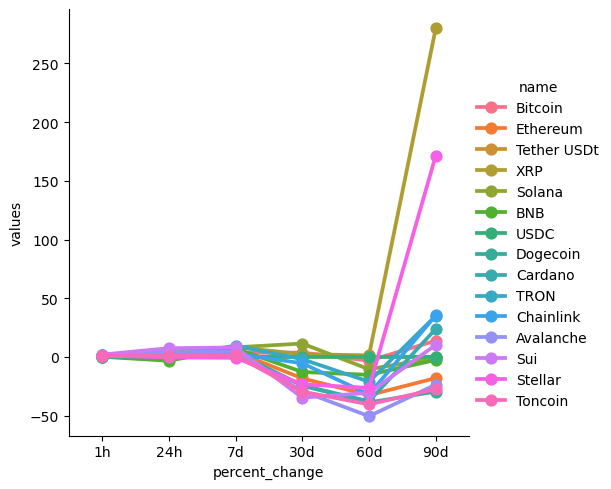

In [161]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [181]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,97817.63416,2025-02-10 21:11:44.225723
15,Bitcoin,97807.47763,2025-02-10 21:12:44.846799
30,Bitcoin,97737.82719,2025-02-10 21:19:55.771033
45,Bitcoin,97711.88713,2025-02-10 21:20:56.321145
60,Bitcoin,97786.30562,2025-02-10 21:21:56.878382


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

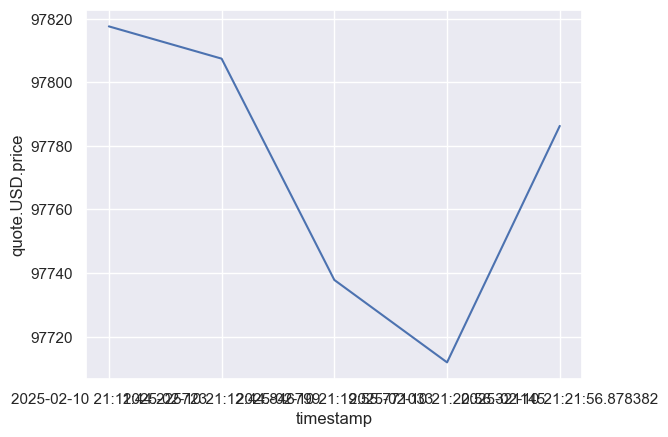

In [189]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)